In [ ]:
digits d

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Digits dataset

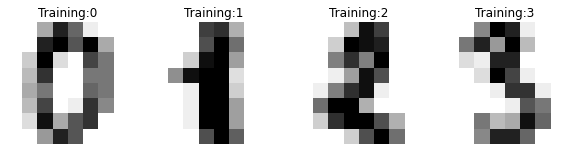

In [6]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows= 1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,digits.images,digits.target):
  ax.set_axis_off()
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i"%label)

Classification

In [15]:
# flatten the images
n_samples = len(digits. images)
data = digits.images.reshape((n_samples,-1))

# Create a cLassifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% Lest subsets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)
# Learn the digits on the train subset
clf.fit(X_train, y_train)
# Predict the value of the digit on the test subset
predicted = clf.predict (X_test)

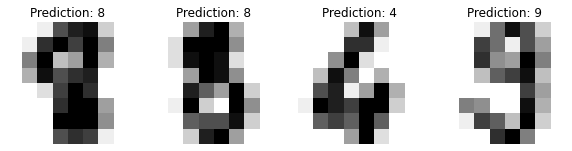

In [17]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
  ax.set_axis_off()
  image = image.reshape(8, 8)
  ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title(f"Prediction: {prediction}")

Confusion matrix:
 [[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


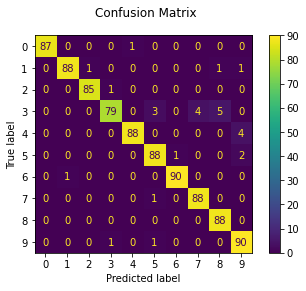

In [19]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test,predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n {disp.confusion_matrix}")
plt.show()

In [21]:
import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784" , version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=10000)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

Sparsity with L1 penalty: 79.80.%
Test socre with L1 penalty:0.6090
Example run in 503.356 s


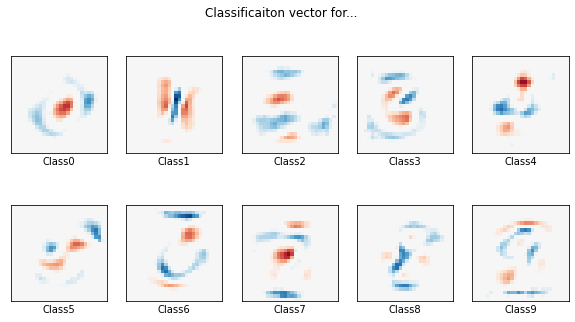

In [23]:
clf = LogisticRegression(C =50.0/ train_samples,penalty = "l1",solver = "saga",tol=0.1)
clf.fit(X_train,y_train)
sparsity = np.mean(clf.coef_==0)*100
score = clf.score(X_test,y_test)

print("Sparsity with L1 penalty: %.2f.%%"%sparsity)
print("Test socre with L1 penalty:%.4f"%score)

coef = clf.coef_.copy()
plt.figure(figsize=(10,5))
scale = np.abs(coef).max()
for i in range(10):
  l1_plot = plt.subplot(2,5,i+1)
  l1_plot.imshow(
      coef[i].reshape(28,28),
      interpolation = "nearest",
      cmap=plt.cm.RdBu,
      vmin=-scale,
      vmax=scale,
  )
  l1_plot.set_xticks(())
  l1_plot.set_yticks(())
  l1_plot.set_xlabel("Class%i"%i)
plt.suptitle("Classificaiton vector for...")
run_time = time.time() -t0
print("Example run in %.3f s"%run_time)
plt.show()